# **스칼라의 Fully-connected Operations**

## What is Fully-connected Operations?

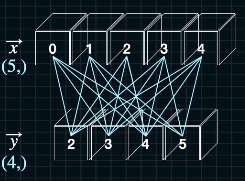

## Imp. of FC Operations

In [ ]:
import numpy as np

x = np.arange(5)
y = np.arange(2,6)

print(f"x: {x}")
print(f"y: {y}")

result = np.empty(5)

for x_ in x:
  for y_ in y:
    print(x_ + y_, end=' ')
  print()

x: [0 1 2 3 4]
y: [2 3 4 5]
2 3 4 5 
3 4 5 6 
4 5 6 7 
5 6 7 8 
6 7 8 9 


method2

In [ ]:
for x_ in x:
  print(x_ + y)

[2 3 4 5]
[3 4 5 6]
[4 5 6 7]
[5 6 7 8]
[6 7 8 9]


## Imp. of Scalar Case with np.meshgrid

In [ ]:
import numpy as np

x = np.arange(5)
y = np.arange(2,6)

X, Y = np.meshgrid(x, y)
Z = X + Y
X, Y, Z = X.T, Y.T, Z.T

print(X)
print(Y)
print(Z)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[[2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]]
[[2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]


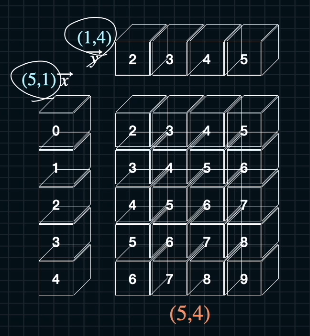

브로드캐스팅을 이용해 forloop 없이 연산

In [ ]:
import numpy as np

x = np.arange(5)
y = np.arange(2,6)

X = x.reshape((-1, 1)) # 벡터를 matrix로 만듬
Y = y.reshape((1, -1))
Z = X + Y

print(X,'\n')
print(Y,'\n')
print(Z)

[[0]
 [1]
 [2]
 [3]
 [4]] 

[[2 3 4 5]] 

[[2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]


In [ ]:
print(f"x[0] + y: {Z[0, :]}")
print(f"x[3] + y: {Z[3, :]}\n")

print(f"y[0] + x: {Z[:, 0]}")
print(f"y[2] + x: {Z[:, 2]}")

x[0] + y: [2 3 4 5]
x[3] + y: [5 6 7 8]

y[0] + x: [2 3 4 5 6]
y[2] + x: [4 5 6 7 8]


# **벡터의 Fully-connected Operations**

## Imp. of Vector Case with for Loop

In [ ]:
import numpy as np

X = np.random.uniform(-5, 5, (4,2))
Y = np.random.uniform(-5, 5, (3,2))

for x in X:
  for y in Y:
    add = x + y
    print(f"{add}", end='  ')
  print()

[3.8114696  4.75755829]  [3.81167477 6.87169951]  [2.32472283 7.74387121]  
[-0.33024205  4.39057776]  [-0.33003688  6.50471898]  [-1.81698882  7.37689068]  
[ 3.35194756 -3.01908732]  [ 3.35215272 -0.9049461 ]  [ 1.86520079 -0.0327744 ]  
[-0.11137565 -3.46771189]  [-0.11117049 -1.35357067]  [-1.59812242 -0.48139897]  


In [1]:
import numpy as np

X = np.random.uniform(-5, 5, (4,2))
Y = np.random.uniform(-5, 5, (3,2))

X = np.expand_dims(X, axis=1)
Y = np.expand_dims(Y, axis=0)
Z = X + Y

print("shape: ")
print(f"X/Y/Z:  {X.shape}/{Y.shape}/{Z.shape}\n")

shape: 
X/Y/Z:  (4, 1, 2)/(1, 3, 2)/(4, 3, 2)



## Imp. of Vector Case with Broadcasting

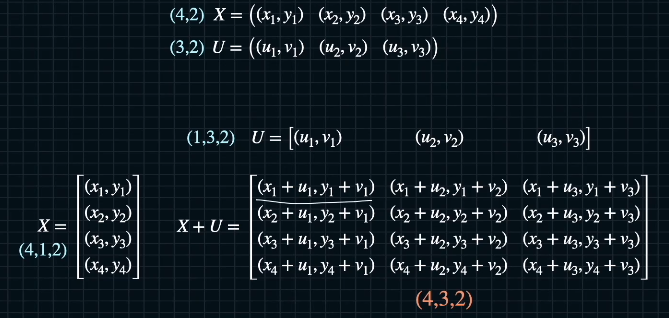

In [3]:
import numpy as np

X = np.random.uniform(-5, 5, (4,2))
Y = np.random.uniform(-5, 5, (3,2))

X = np.expand_dims(X, axis=1)
Y = np.expand_dims(Y, axis=0)
Z = X + Y

print(f"X[0] + Y: \n{Z[0, : , :]}")

X[0] + Y: 
[[-1.59437839 -1.38124619]
 [-3.56070634  1.43122068]
 [ 2.64074464  2.2090302 ]]


In [4]:
print(f"X[3] + Y: \n{Z[0, : , :]}")

X[3] + Y: 
[[-1.59437839 -1.38124619]
 [-3.56070634  1.43122068]
 [ 2.64074464  2.2090302 ]]


In [5]:
print(f"Y[0] + Y: \n{Z[:, 0 , :]}")

Y[0] + Y: 
[[-1.59437839 -1.38124619]
 [-2.19236384 -5.75284861]
 [ 1.44410691 -0.32529076]
 [-6.62728287  0.24360785]]


## Fully-Connected Operations for Euclidean Distances

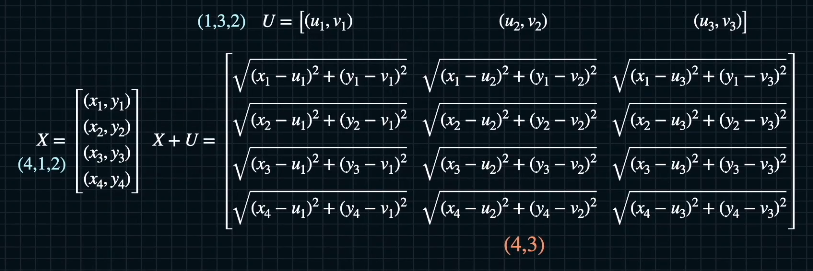

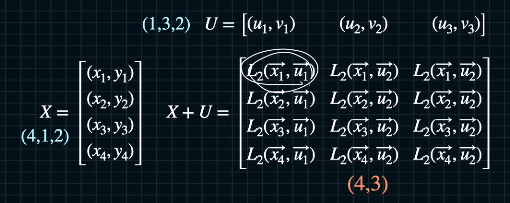

In [8]:
import numpy as np

X = np.random.uniform(-5, 5, (4, 2))
Y = np.random.uniform(-5, 5, (3, 2))

for x in X:
  for y in Y:
    e_dist = np.sqrt(np.sum(np.square(x - y)))
    print(f"{e_dist:5.2f}", end=' ')
  print()

 3.17  5.38  4.26 
 6.38  4.87  1.64 
 6.20  5.62  8.04 
 7.12  3.15  0.60 


In [9]:
import numpy as np

X = np.random.uniform(-5, 5, (4, 2))
Y = np.random.uniform(-5, 5, (3, 2))

X = np.expand_dims(X, axis=1)
Y = np.expand_dims(Y, axis=0)

Z = np.sqrt(np.sum(np.square(X - Y), axis=-1))  # 마지막 차원을 기준으로 더해줘야함
print(Z)

[[7.11644064 2.15807887 4.47266065]
 [8.96276723 8.77206019 2.80459053]
 [9.79464706 3.79143449 9.53062968]
 [4.44956476 6.77372241 3.86146991]]


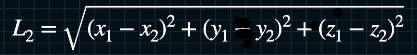

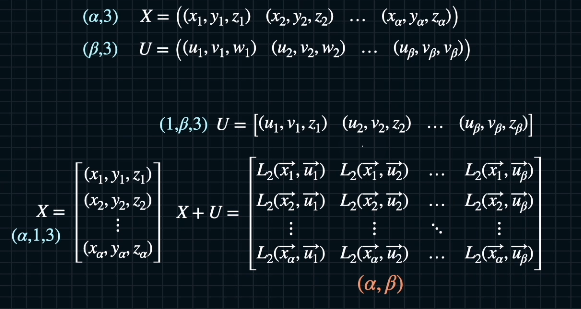

In [10]:
import numpy as np

X = np.random.uniform(-5, 5, (4, 2))
Y = np.random.uniform(-5, 5, (3, 2))

X = np.expand_dims(X, axis=1) #(4, 1, 2)
Y = np.expand_dims(Y, axis=0) #(1, 3, 2)

Z = np.sqrt(np.sum(np.square(X-Y), axis=-1))
print(Z)

[[7.10236537 2.15229052 2.27829282]
 [2.7019863  4.88292472 3.46455715]
 [2.83840478 6.44212221 5.06680567]
 [4.71815956 2.81880163 1.36663189]]


## Scalar Case

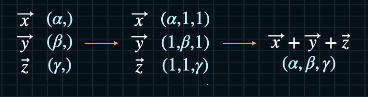

## Vector Case

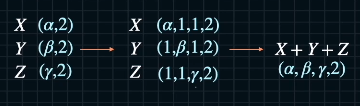